## Import library

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

In [59]:
# Path_art = 'BBC News Summary/News Articles'
# Path_sum = 'BBC News Summary/Summaries'
# Path_art_cat = []
# Path_sum_cat = []

# dir_list = os.listdir(Path_art)
# for dir in dir_list:
#     Path_art_cat.append(Path_art+'/'+dir)

# dir_list = os.listdir(Path_sum)
# for dir in dir_list:
#     Path_sum_cat.append(Path_sum+'/'+dir)

In [60]:
df = pd.read_csv("BBC_News_Summary_with_filename.csv")
df.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file
0,0,Ad sales boost Time Warner profit\r\n\r\nQuart...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt
1,1,Dollar gains on Greenspan speech\r\n\r\nThe do...,The dollar has hit its highest level against t...,business,002.txt,002.txt
2,2,Yukos unit buyer faces loan claim\r\n\r\nThe o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt
3,3,High fuel prices hit BA's profits\r\n\r\nBriti...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt
4,4,Pernod takeover talk lifts Domecq\r\n\r\nShare...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt


## Remove '\r\n'

In [61]:
df = df.replace(r'\r\n\r\n',' ', regex=True)
df.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file
0,0,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt
1,1,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...,business,002.txt,002.txt
2,2,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt
3,3,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt
4,4,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

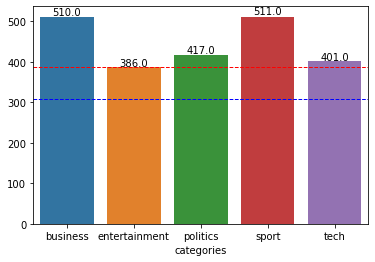

In [120]:
plt.figure(figsize=(6,4))

category_sizes = df.groupby('categories').size()
ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

min_val = category_sizes.min()
plt.axhline(y=min_val,color='red',ls='--', lw=1)
plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()

In [63]:
#-- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [64]:
category_length = df.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length       summaries_length      
                         mean   max             mean   max
categories                                                
business           328.880392   891       139.929412   403
entertainment      330.621762  3482       144.049223  1706
politics           453.973621  4432       195.709832  2073
sport              329.262231  1662       143.187867   659
tech               502.695761  2969       213.837905  1430

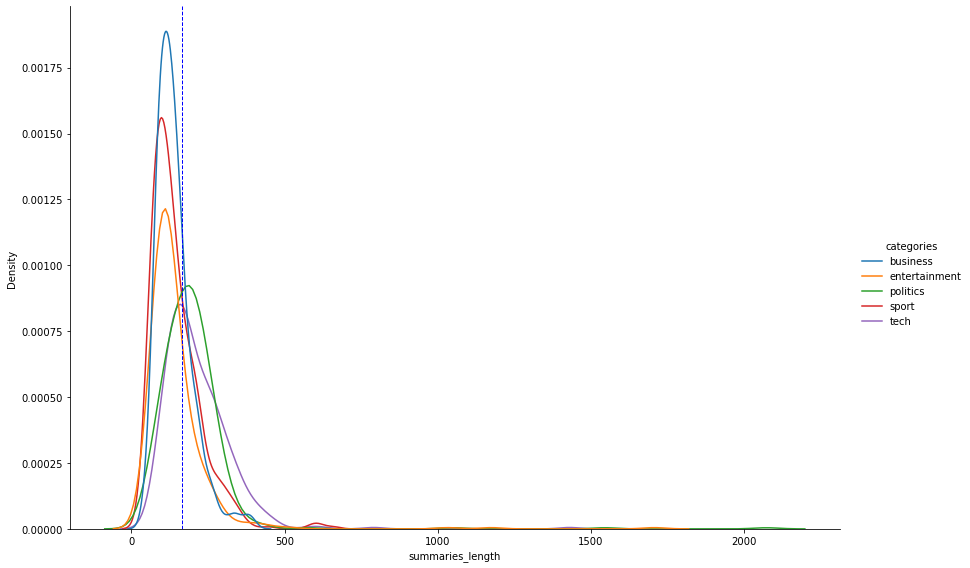

In [65]:
sns.displot(
    data = df, 
    x = 'summaries_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

plt.axvline(x=df.summaries_length.mean(),
            color='blue',
            ls='--', 
            lw=1)

In [ ]:
# Box plot

In [66]:
df[df['summaries_length']==1706]

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file,articles_length,summaries_length
762,762,Scissor Sisters triumph at Brits US band Sciss...,"Angels is a great song, but not the best song ...",entertainment,253.txt,253.txt,3482,1706


In [67]:
df_filter = df[df['articles_length']<=512]
df_filter.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file,articles_length,summaries_length
0,0,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt,421,134
1,1,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...,business,002.txt,002.txt,384,158
2,2,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt,264,121
3,3,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt,406,197
4,4,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt,265,106


In [68]:
category_length = df_filter.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length      summaries_length     
                         mean  max             mean  max
categories                                              
business           299.433761  505       127.465812  259
entertainment      275.052023  511       118.994220  254
politics           361.431973  512       154.469388  275
sport              277.400000  511       121.608889  261
tech               364.202429  511       152.878543  253

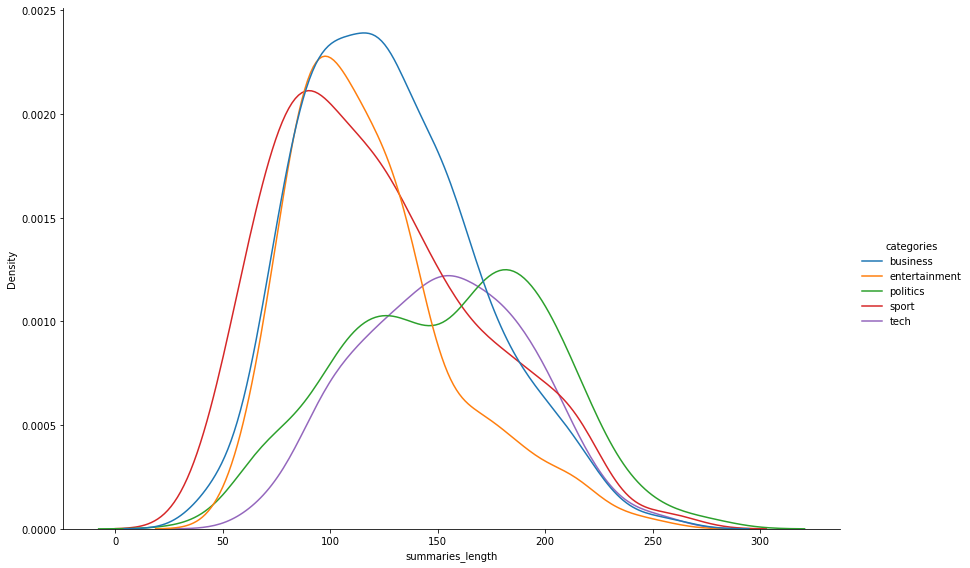

In [69]:
sns.displot(
    data = df_filter, 
    x = 'summaries_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

For Fine tuning: 197
For Evaluating: 49


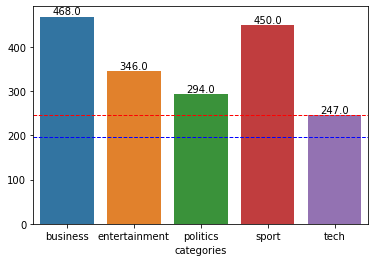

In [119]:
plt.figure(figsize=(6,4))

category_sizes = df_filter.groupby('categories').size()

ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

min_val = category_sizes.min()
print("For Fine tuning:", int(min_val*0.8))
print("For Evaluating:", int(min_val*0.2))
plt.axhline(y=min_val,color='red',ls='--', lw=1)
plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()